<a href="https://colab.research.google.com/github/Shaillucky/Data-Processing-EDA/blob/main/Decision_Tree_With_Smote_Preprocessing_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Loading Libraries**

In [1]:
# To install these packages if they aren't there already
# use below install commands:

import pandas as pd
import numpy as np
import random
import sklearn
from collections import Counter

## Load Fraud Data

Using the link to access the data.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Imbalanced_classes/master/fraud_data.csv")

In [3]:
data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,...,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,...,mobile safari generic,32.0,1136x640,match_status:2,T,F,T,F,mobile,iOS Device
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Description : 

IEEE Fraud Dataset was provided at Kaggle a year ago:

  - **Categorial Features- Transaction**
  - ProductCD - Product Code
  - card1 - card6: payment card information, such as card type, card category,
  issue bank, country, etc.
  - addr1,addr2
  - P_emaildomain - Purchaser
  - R_emaildomain - Recipient
  - M1 - M9 - March between names on card and address etc.
  - **Categorical Features- Identity**
  - DeviceType
  - DeviceInfo
  - id_2 - id_38 customer idnetity variables
  - The TransactionDT feature is a timedelta from a given refrence datetime
  (not an actual timestamp)
  - **Outcome/Target Variables- isFraud**
  - whether transaction is fraud or not
  
The data is available is here : "https://www.kaggle.com/c/ieee-fraud-detection/data"

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59054 entries, 0 to 59053
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(385), int64(18), object(31)
memory usage: 195.5+ MB


In [5]:
data.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+04,59054.000000,5.905400e+04,59054.000000,59054.000000,58139.000000,58896.000000,58610.000000,52326.000000,52326.000000,...,14061.00000,4511.000000,14059.000000,14054.000000,525.000000,525.000000,487.000000,524.000000,525.000000,7715.000000
mean,3.282166e+06,0.033952,7.368220e+06,134.142888,9910.366360,362.438054,153.264551,199.104231,290.653939,86.806616,...,189.89958,14.238750,351.767622,404.594777,385.257143,15.748571,12.739220,326.225191,148.794286,26.499028
std,1.702573e+05,0.181107,4.612063e+06,233.112295,4893.704524,157.360648,11.395609,41.296438,101.796538,2.639572,...,30.34787,1.524658,141.600677,152.201538,213.565534,6.496154,2.275238,97.662855,31.168092,3.739140
min,2.987019e+06,0.000000,8.673000e+04,0.292000,1008.000000,100.000000,100.000000,100.000000,100.000000,13.000000,...,100.00000,11.000000,100.000000,100.000000,114.000000,14.000000,11.000000,100.000000,100.000000,0.000000
25%,3.135748e+06,0.000000,3.074217e+06,42.950000,6019.000000,215.000000,150.000000,166.000000,204.000000,87.000000,...,166.00000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282062e+06,0.000000,7.288450e+06,68.017000,9749.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.00000,15.000000,339.000000,484.000000,252.000000,14.000000,11.000000,321.000000,147.000000,24.000000
75%,3.429699e+06,0.000000,1.123918e+07,117.000000,14223.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.00000,15.000000,427.000000,533.000000,554.000000,14.000000,15.000000,361.000000,169.000000,32.000000
max,3.577536e+06,1.000000,1.581105e+07,5279.950000,18390.000000,600.000000,229.000000,237.000000,536.000000,102.000000,...,225.00000,29.000000,670.000000,660.000000,854.000000,43.000000,24.000000,548.000000,216.000000,32.000000


In [6]:
data.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)

In [7]:
data.shape

(59054, 434)

In [8]:
data.size

25629436

# Traget Variable here is "isFraud".

Checking the fraud transactions.

1) How many fraud transactions are there ?

2) How many normal transactions are there ?

In [9]:
data.isFraud.value_counts()

0    57049
1     2005
Name: isFraud, dtype: int64

# Pre-Processing and Data Wrangling : 

Train Test Split - To evaluate the performance in an unbiased manner

In [10]:
# set x and y variables

y = data['isFraud']
X = data.drop('isFraud', axis=1)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state=123)

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41337 entries, 12662 to 52734
Columns: 433 entries, TransactionID to DeviceInfo
dtypes: float64(385), int64(17), object(31)
memory usage: 136.9+ MB


## Step1 : Check for Missingness in Variables:


In [13]:
# Check how many missing/null values in each variable
X_train.isnull().sum()

TransactionID         0
TransactionDT         0
TransactionAmt        0
ProductCD             0
card1                 0
                  ...  
id_36             31403
id_37             31403
id_38             31403
DeviceType        31419
DeviceInfo        33011
Length: 433, dtype: int64

# Removing variable with more than 20% of missingness

In [14]:
# Eliminate variables

X_train_before_filling = X_train
X_train = X_train[X_train.columns[X_train.isnull().mean() < 0.2]]

# Now checking which among remaining columns have missing valeus

In [15]:
missing_cols = X_train.columns[X_train.isnull().mean() > 0]
missing_cols

Index(['card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2',
       'P_emaildomain', 'D1', 'D10',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=162)

In [16]:
X_train['card5'].isnull().mean()

0.007499334736434671

# Imputation:
Filling missing values in a varibale by reasonable approximations like mean of the varibale to allow machine learning models to work


Step 1: *Single Imputation Technique*

Impute Numeric Variables with mean of the variable

In [17]:
X_train_single = X_train
cols = X_train_single.columns
num_cols = X_train_single.select_dtypes(include=np.number).columns
X_train_single.loc[:, 
                   num_cols] = X_train_single.loc[:,
                   num_cols].fillna(X_train_single.loc[:,
                   num_cols].mean())

print(num_cols)
print(X_train_single.loc[:, num_cols].mean())

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2',
       'card3', 'card5', 'addr1', 'addr2', 'C1',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=177)
TransactionID     3.281805e+06
TransactionDT     7.357705e+06
TransactionAmt    1.347207e+02
card1             9.912457e+03
card2             3.626188e+02
                      ...     
V317              2.722976e+02
V318              1.823263e+02
V319              1.665254e+01
V320              4.211091e+01
V321              2.752951e+01
Length: 177, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


# Impute Categorical Variables with mode od the variable

In [18]:
cat_cols = list(set(cols)- set(num_cols))
X_train_single.loc[:, cat_cols] = X_train_single.loc[:, cat_cols].fillna(X_train.loc[:,cat_cols].mode().iloc[0])
train_cols = X_train_single.columns
print(cat_cols)
print(X_train_single.loc[:, cat_cols].mode().iloc[0])

['P_emaildomain', 'card4', 'card6', 'ProductCD']
P_emaildomain    gmail.com
card4                 visa
card6                debit
ProductCD                W
Name: 0, dtype: object


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


## Check if missingness is now 0 for all variables remaining

In [19]:
# Select those variables which have missing values
X_train_single.columns[X_train_single.isnull().mean() > 0]

Index([], dtype='object')

Comparing variable before and after filling: Remember cariable 'Card5' Earlier

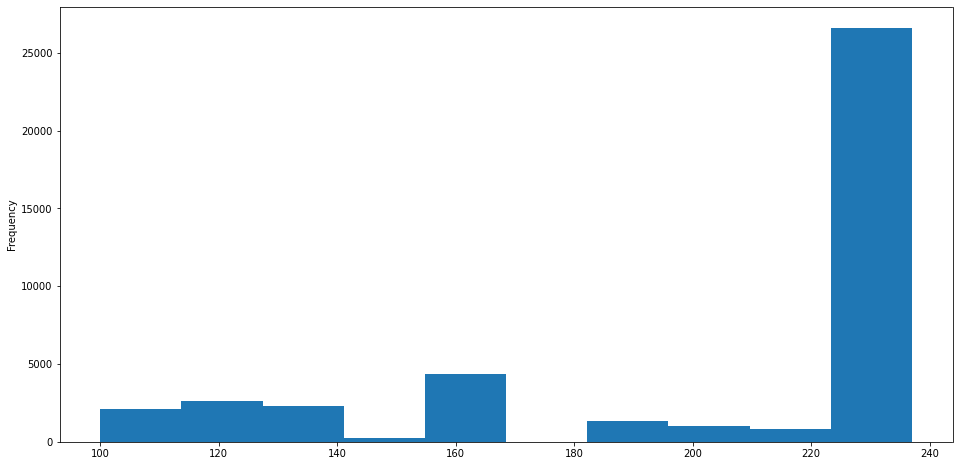

In [20]:
X_train_single['card5'].plot.hist(figsize=(16,8))

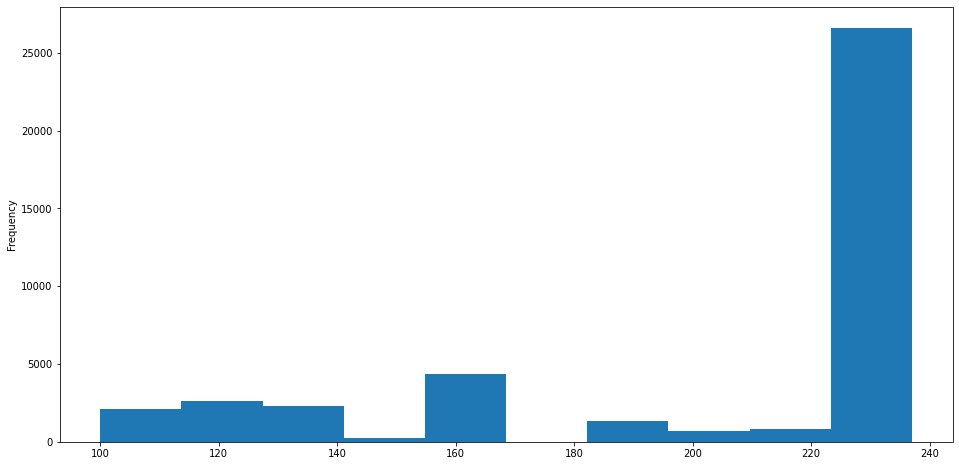

In [21]:
X_train_before_filling['card5'].plot.hist(figsize=(16,8))

In [22]:
X_train_single['card5'].describe()

count    41337.000000
mean       199.235991
std         41.036349
min        100.000000
25%        166.000000
50%        226.000000
75%        226.000000
max        237.000000
Name: card5, dtype: float64

In [23]:
X_train_before_filling['card5'].describe()

count    41027.000000
mean       199.235991
std         41.191096
min        100.000000
25%        166.000000
50%        226.000000
75%        226.000000
max        237.000000
Name: card5, dtype: float64

The variable 'card5' didn't change much as a whole (except for very slight change in standard deviation of the variable) even after filling with mean values. 

So filling values isn't changing the existing variables much because of filling with measures like mean of the variable. It just models to not misunderstand missing values

In [24]:
X_train = X_train_single

### Step 2: 
One Hot Encoding : To make all variables numeric to feed to machine learning

In [25]:
X_train.info()
X_train_dummy = pd.get_dummies(X_train, prefix_sep='_', drop_first=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41337 entries, 12662 to 52734
Columns: 181 entries, TransactionID to V321
dtypes: float64(160), int64(17), object(4)
memory usage: 57.4+ MB


In [26]:
X_train_dummy

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,...,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
12662,3058646,1612658,46.500,7861,494.0,150.0,226.0,299.000000,87.000000,1,...,0,0,0,0,0,0,0,0,0,0
47037,3469434,12533197,20.950,10748,455.0,150.0,195.0,337.000000,87.000000,9,...,0,0,0,0,0,0,0,0,0,0
29179,3302515,7855766,139.117,4606,141.0,185.0,137.0,290.763705,86.802851,1,...,0,0,0,0,0,0,0,0,0,0
40680,3010196,595984,280.330,4141,404.0,150.0,102.0,327.000000,87.000000,1,...,0,0,0,0,0,0,0,0,0,0
6080,3288879,7447462,186.610,13266,321.0,150.0,226.0,158.000000,87.000000,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54370,3500688,13452492,311.950,10057,225.0,150.0,224.0,123.000000,87.000000,3,...,0,0,0,0,0,0,0,0,0,0
17730,3038837,1212291,114.950,2492,543.0,150.0,224.0,299.000000,87.000000,3,...,0,0,0,0,0,0,0,0,0,0
28030,3055357,1544901,75.000,1690,516.0,150.0,224.0,110.000000,87.000000,1,...,0,0,0,0,0,0,0,0,0,0
15725,3144269,3273875,206.000,17188,321.0,150.0,226.0,310.000000,87.000000,6,...,0,0,0,0,0,0,0,0,0,0


## Finalizing the data before training a model

In [27]:
final_data = pd.DataFrame(data= X_train_dummy)

print(final_data.head())
print(final_data.shape)

       TransactionID  TransactionDT  TransactionAmt  card1  card2  card3  \
12662        3058646        1612658          46.500   7861  494.0  150.0   
47037        3469434       12533197          20.950  10748  455.0  150.0   
29179        3302515        7855766         139.117   4606  141.0  185.0   
40680        3010196         595984         280.330   4141  404.0  150.0   
6080         3288879        7447462         186.610  13266  321.0  150.0   

       card5       addr1      addr2  C1  ...  P_emaildomain_web.de  \
12662  226.0  299.000000  87.000000   1  ...                     0   
47037  195.0  337.000000  87.000000   9  ...                     0   
29179  137.0  290.763705  86.802851   1  ...                     0   
40680  102.0  327.000000  87.000000   1  ...                     0   
6080   226.0  158.000000  87.000000  13  ...                     0   

       P_emaildomain_windstream.net  P_emaildomain_yahoo.co.jp  \
12662                             0                     

## Decision Tree Using Grid Search CV

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model_d =DecisionTreeClassifier()
parameters = {'max_depth': range(3,20)}
clf = GridSearchCV(model_d, parameters, n_jobs= 4, cv=5, scoring='roc_auc')
clf.fit(X = final_data, y= y_train)
dt = clf.best_estimator_  # Final Decision Tree

print(clf.best_score_, clf.best_params_)

0.7630140428847592 {'max_depth': 8}


### Visualizing the decision tree initially

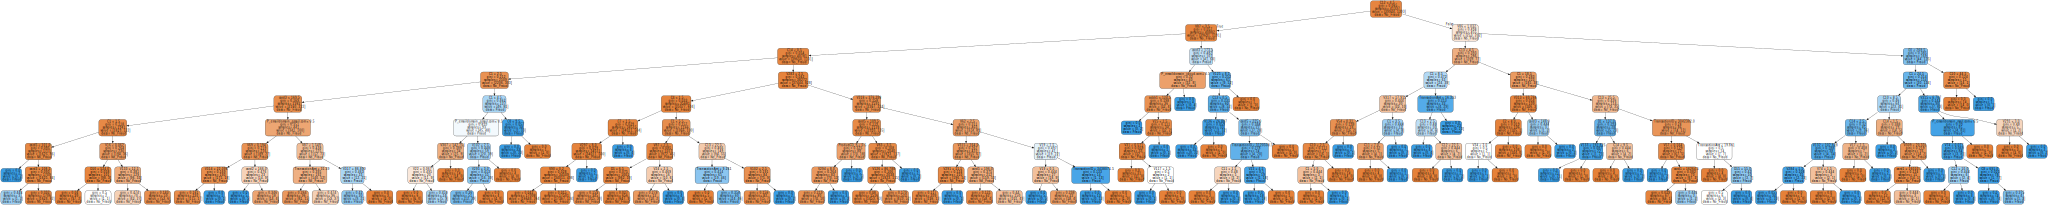

In [29]:
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names= final_data.columns,
                                class_names=['No_Fraud', 'Fraud'],
                                filled=True, rounded=True, 
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### **Part 2: Handling Class Imbalance**


What is Class imbalance? 
  - Class imbalance in classification problem is too less data points of one class compared to another class we are trying to predict. It leads to machine to learn too much of the dominant class and too less about the minority class!

*Using the data from step 2 ( One Hot Encoded)*
#### Use SMOTE and Resample data


  --------
**SMOTE: Synthetic Minority Oversampling Technique :**

We can update the example to first oversample the minority class to have 20 percent the number of examples of the majority class (here about 8k), then use random undersampling to reduce the number of examples in the majority class. But we are NOT undersampling majority class as this worked best for this case and we will see the results later!

## Applying SMOTE Oversampling and Undersampling Technique

In [30]:
# Libraries and fucntions to load for class imbalance

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy=0.2, random_state=2)

# under = RandomUnderSampler(sampling_strategy=0.2) : we are avoid under sampling of non fraud data, to avoid removing data: this worked well in this case!
steps = [('o', over)]
pipeline = Pipeline(steps=steps)
X_res, y_res = pipeline.fit_resample(X_train_dummy, y_train)

print('Original dateset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_res))

Original dateset shape Counter({0: 39944, 1: 1393})
Resampled dataset shape Counter({0: 39944, 1: 7988})


As you see in the above output, the dataset originally had just 1393 fraud cases and arodun 40k non fraud transactions.

Now thanks to oversampling via SMOTE, we have number of fraud and non-fraud cases in the ratio 1:5 and are relatively balanced information for model to learn

------------ 

Now let us use SMOTE'd data for training a decsision tree classifier on it!

In [32]:
from sklearn import preprocessing
final_data_res = pd.DataFrame(data=X_res)
final_data_res.columns = X_train_dummy.columns
final_data_res
print(final_data_res.head())

   TransactionID  TransactionDT  TransactionAmt  card1  card2  card3  card5  \
0        3058646        1612658          46.500   7861  494.0  150.0  226.0   
1        3469434       12533197          20.950  10748  455.0  150.0  195.0   
2        3302515        7855766         139.117   4606  141.0  185.0  137.0   
3        3010196         595984         280.330   4141  404.0  150.0  102.0   
4        3288879        7447462         186.610  13266  321.0  150.0  226.0   

        addr1      addr2  C1  ...  P_emaildomain_web.de  \
0  299.000000  87.000000   1  ...                     0   
1  337.000000  87.000000   9  ...                     0   
2  290.763705  86.802851   1  ...                     0   
3  327.000000  87.000000   1  ...                     0   
4  158.000000  87.000000  13  ...                     0   

   P_emaildomain_windstream.net  P_emaildomain_yahoo.co.jp  \
0                             0                          0   
1                             0               

#### Decision Tree using Grid Search CV

In [33]:
model2 = DecisionTreeClassifier()
paramters= {'max_depth': range(3,20)}
clf = GridSearchCV(model2, parameters,n_jobs=4, cv=5, scoring='roc_auc')
clf.fit(final_data_res, y_res)

dt_smote= clf.best_estimator_
print(clf.best_score_, clf.best_params_)

0.931384286030638 {'max_depth': 8}


**As we can see here there is an increase in the performance of resampled data after handling imbalance class.**


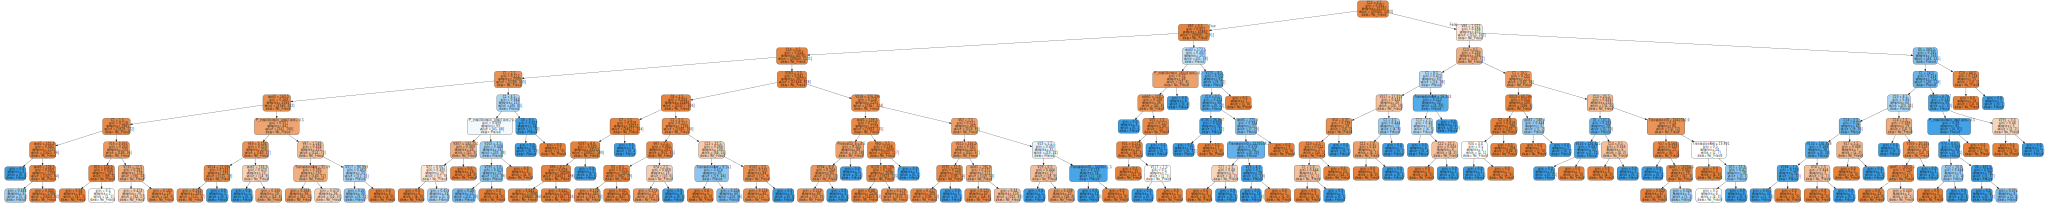

In [36]:
# Visulize the decision tree 
from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree

data1 =  tree.export_graphviz(dt, out_file=None,
                              feature_names= final_data_res.columns, 
                              class_names =['No_Fraud', 'Fraiud'],
                              filled= True, rounded=True, 
                              special_characters=True)

graph = graphviz.Source(data1)
graph

## --------------------------------------------------The Real Test -------------------------------------------------

## Apply on Test Data: Apply step 1-2 namely and then do prediction

1. Apply single imputation.
2. Select Only variables which rae used for training.
3. One Hot Encode variables
4. Make sure test data again has exact same number of variables as training

## Step 1: Account for missing values with single imputation like we did earlier

In [38]:
cols = X_test.columns
num_cols = X_test.select_dtypes(include=np.number).columns
X_test.loc[:, num_cols]= X_test.loc[:, 
                                    num_cols].fillna(X_test.loc[:,num_cols].mean())
                      
cat_cols = list(set(cols)-set(num_cols))
X_test.loc[:, cat_cols] = X_test.loc[:, cat_cols].fillna(X_test.loc[:,cat_cols].mode().iloc[0])
test_cols = X_test.columns

## Step 2: Select only those features which are there in training

In [39]:
X_test = X_test[train_cols]

## Step 3. One Hot encode variables

In [40]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17717 entries, 59044 to 426
Columns: 181 entries, TransactionID to V321
dtypes: float64(160), int64(17), object(4)
memory usage: 24.6+ MB


In [42]:
X_test_dummy = pd.get_dummies(X_test, prefix_sep='_', drop_first=True)

# Dummify categorical variables
X_test_dummy = pd.get_dummies(X_test, prefix_sep='_', drop_first=True)

## Missing columns levels train and test
missing_levels_cols = list(set(X_train_dummy.columns)- set(X_test_dummy.columns))

for c in missing_levels_cols:
  X_test_dummy[c]= 0

# Select only those columns which are there is training data 

X_test_dummy = X_test_dummy[X_train_dummy.columns]

## Step 4: make sure test data again has exact same number of variables as training !

In [43]:
from sklearn import preprocessing

final_ts = pd.DataFrame(data=X_test_dummy)
final_ts.columns = X_test_dummy.columns
final_ts
print(final_ts.head())
print(final_ts.shape)

       TransactionID  TransactionDT  TransactionAmt  card1      card2  card3  \
59044        3195138        4809520          36.950  17188  321.00000  150.0   
29992        3181635        4385698         612.950   2616  362.01623  150.0   
56452        3246331        6215794          49.000  12581  453.00000  150.0   
7059         3015519         716506         150.000  16659  170.00000  150.0   
49961        3353372        9094718         140.658   2256  545.00000  185.0   

       card5       addr1      addr2  C1  ...  P_emaildomain_web.de  \
59044  226.0  310.000000  87.000000   2  ...                     0   
29992  102.0  204.000000  87.000000   1  ...                     0   
56452  226.0  299.000000  87.000000   1  ...                     0   
7059   226.0  299.000000  87.000000  17  ...                     0   
49961  226.0  290.396535  86.815445   2  ...                     0   

       P_emaildomain_windstream.net  P_emaildomain_yahoo.co.jp  \
59044                           

### Prediction on test data: Without SMOTE 

In [44]:
y_test_dt = dt.predict_proba(final_ts)

In [45]:
from sklearn.metrics import roc_auc_score, roc_curve

print(' The ROC AUC Curve score for 1st model without SMOTE is {}'.format(roc_auc_score(y_test, y_test_dt[:,1])))

 The ROC AUC Curve score for 1st model without SMOTE is 0.7700978481619677


## Prediction on test data:  With SMOTE

In [46]:
y_test_dt_smote = dt_smote.predict_proba(final_ts)

In [47]:
from sklearn.metrics import roc_auc_score, roc_curve

print(' The ROC AUC Curve score for 1st model withSMOTE is {}'.format(roc_auc_score(y_test, y_test_dt_smote[:,1])))

 The ROC AUC Curve score for 1st model withSMOTE is 0.8181269857645873


There is increase in performance of decision tree classifer after SMOTE is applied, with respect to AUC.